In [24]:
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8.27)})
sns.set(style="whitegrid")

In [3]:
!ls

BERT				   figures
Explore_huggingfacedatasets.ipynb  huen.csv
Low_resource_sampling.ipynb	   huen_low_resource.csv
Low_resource_visualization.ipynb   hunglish2-data-exploration.ipynb
MarianMTbacktranslate.ipynb	   hunglish2-sampler-Bence.ipynb
Tatoeba_EDA.ipynb		   hunglish2-sampler.ipynb
Tatoeba_test_overlap_check.ipynb   lsh.ipynb
Untitled.ipynb			   setup_law.sh
enhu.csv			   subtitles.txt
enhu_low_resource.csv		   token_ids_to_text.ipynb


In [4]:
df_huen = pd.read_csv('huen_low_resource.csv')

In [5]:
df_huen

,type,bleu
0,base,0.0
1,object swapping,0.0
2,subject swapping,0.0
3,base,0.1
4,object swapping,0.1
5,subject swapping,0.0
6,base,0.1
7,object swapping,0.1
8,subject swapping,0.3
9,base,0.8


In [14]:
sample_sizes = []
base = [5, 10, 25, 50, 75, 100, 200, 300, 400, 500]
for i in range(int(df_huen.shape[0] / 3)):
    sample_sizes.extend((f'{base[i]}k ' * 3).strip().split(' '))

In [15]:
sample_sizes

['5k',
 '5k',
 '5k',
 '10k',
 '10k',
 '10k',
 '25k',
 '25k',
 '25k',
 '50k',
 '50k',
 '50k',
 '75k',
 '75k',
 '75k',
 '100k',
 '100k',
 '100k',
 '200k',
 '200k',
 '200k',
 '300k',
 '300k',
 '300k',
 '400k',
 '400k',
 '400k',
 '500k',
 '500k',
 '500k']

In [16]:
df_huen['sample_size'] = sample_sizes

In [17]:
df_huen

,type,bleu,sample_size
0,base,0.0,5k
1,object swapping,0.0,5k
2,subject swapping,0.0,5k
3,base,0.1,10k
4,object swapping,0.1,10k
5,subject swapping,0.0,10k
6,base,0.1,25k
7,object swapping,0.1,25k
8,subject swapping,0.3,25k
9,base,0.8,50k


<AxesSubplot:xlabel='sample_size', ylabel='bleu'>

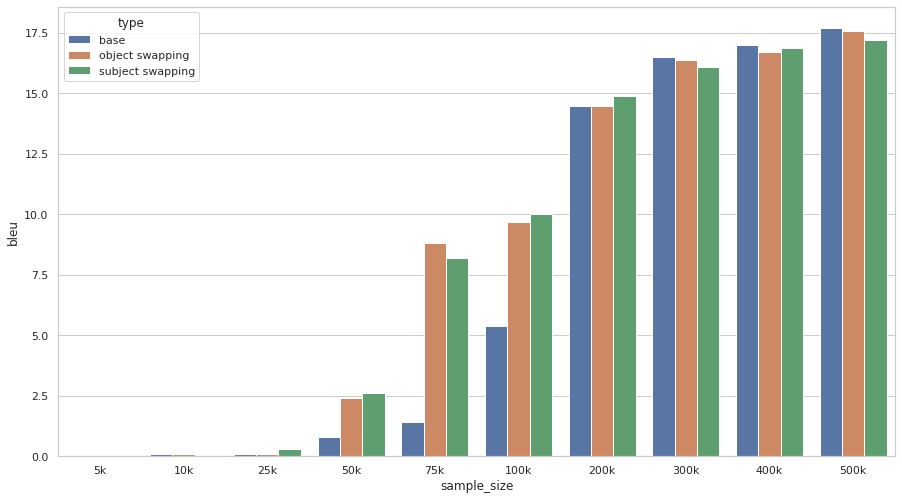

In [25]:
sns.barplot(x='sample_size', y='bleu', hue='type', data=df_huen)

In [31]:
bases = []
for row in df_huen.iterrows():
    bases.append(row[1]['bleu'] if row[1]['type'] == 'base' else bases[-1])

In [33]:
df_huen['base_bleu'] = bases

In [35]:
df_huen['absolute_bleu'] = df_huen['bleu'] - df_huen['base_bleu']

In [36]:
df_huen

,type,bleu,sample_size,base_bleu,absolute_bleu
0,base,0.0,5k,0.0,0.0
1,object swapping,0.0,5k,0.0,0.0
2,subject swapping,0.0,5k,0.0,0.0
3,base,0.1,10k,0.1,0.0
4,object swapping,0.1,10k,0.1,0.0
5,subject swapping,0.0,10k,0.1,-0.1
6,base,0.1,25k,0.1,0.0
7,object swapping,0.1,25k,0.1,0.0
8,subject swapping,0.3,25k,0.1,0.2
9,base,0.8,50k,0.8,0.0


In [38]:
df_huen_without_base = df_huen[df_huen['type'] != 'base']

In [41]:
df_huen_without_base = df_huen_without_base.rename(columns={'type': 'Augmentation method', 'absolute_bleu': 'BLEU score difference', 'sample_size': 'Sample size'})

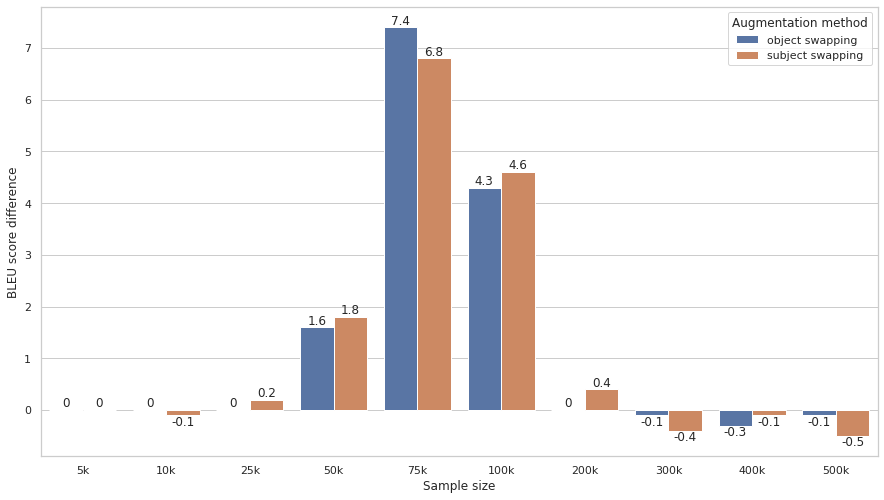

In [45]:
ax = sns.barplot(x='Sample size', y='BLEU score difference', hue='Augmentation method', data=df_huen_without_base)
for container in ax.containers:
    ax.bar_label(container)

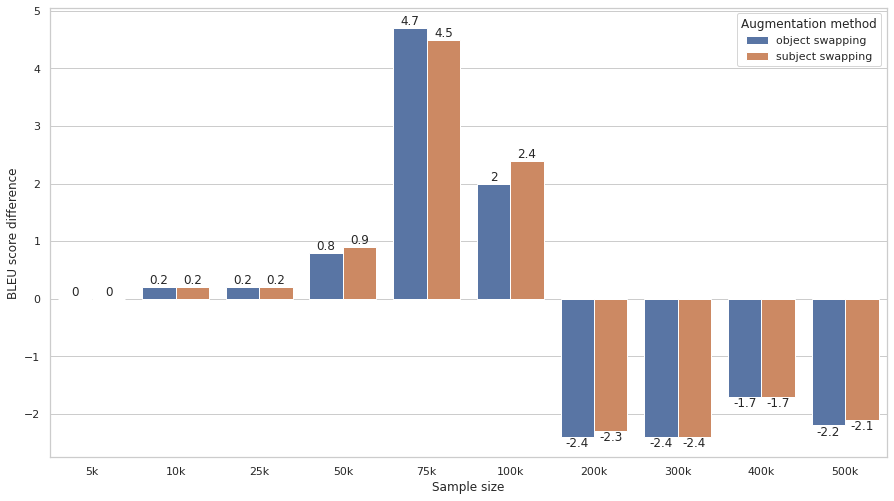

In [46]:
df_enhu = pd.read_csv('enhu_low_resource.csv')
df_enhu['sample_size'] = sample_sizes
df_enhu['base_bleu'] = bases
df_enhu['absolute_bleu'] = df_enhu['bleu'] - df_enhu['base_bleu']
df_enhu_without_base = df_enhu[df_enhu['type'] != 'base']
df_enhu_without_base = df_enhu_without_base.rename(columns={'type': 'Augmentation method', 'absolute_bleu': 'BLEU score difference', 'sample_size': 'Sample size'})
ax = sns.barplot(x='Sample size', y='BLEU score difference', hue='Augmentation method', data=df_enhu_without_base)
for container in ax.containers:
    ax.bar_label(container)